In [1]:
import torch
from torch.utils.cpp_extension import load
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
import pytorchode

In [3]:
pytorchodecuda = load(name="cudaSolvercpp", sources=["cudaSolverInterface.cpp", "cudaSolver.cu"])

/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/utils/cpp_extension.py:166: UserWarning: 

                               !! WARNING !!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Your compiler (/mnt/home/20184659/.conda/envs/proj/bin/x86_64-conda_cos6-linux-gnu-c++) is not compatible with the compiler Pytorch was
built with for this platform, which is g++ on linux. Please
use g++ to to compile your extension. Alternatively, you may
compile PyTorch from source using /mnt/home/20184659/.conda/envs/proj/bin/x86_64-conda_cos6-linux-gnu-c++, and then you can also use
/mnt/home/20184659/.conda/envs/proj/bin/x86_64-conda_cos6-linux-gnu-c++ to compile your extension.

See https://github.com/pytorch/pytorch/blob/master/CONTRIBUTING.md for help
with compiling PyTorch from source.
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

                              !! WARNING !!

  platform=sys.platform))


RuntimeError: Error building extension 'cudaSolvercpp': b'[1/3] /mnt/home/20184659/.conda/envs/proj/bin/x86_64-conda_cos6-linux-gnu-c++ -MMD -MF cudaSolverInterface.o.d -DTORCH_EXTENSION_NAME=cudaSolvercpp -DTORCH_API_INCLUDE_EXTENSION_H -isystem /mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include -isystem /mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/torch/csrc/api/include -isystem /mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/TH -isystem /mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/THC -isystem /usr/local/cuda/include -isystem /mnt/home/20184659/.conda/envs/proj/include/python3.7m -D_GLIBCXX_USE_CXX11_ABI=0 -fPIC -std=c++11 -c /mnt/home/20184659/torchODE/cudaSolverInterface.cpp -o cudaSolverInterface.o\n[2/3] /usr/local/cuda/bin/nvcc -DTORCH_EXTENSION_NAME=cudaSolvercpp -DTORCH_API_INCLUDE_EXTENSION_H -isystem /mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include -isystem /mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/torch/csrc/api/include -isystem /mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/TH -isystem /mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/THC -isystem /usr/local/cuda/include -isystem /mnt/home/20184659/.conda/envs/proj/include/python3.7m -D_GLIBCXX_USE_CXX11_ABI=0 -D__CUDA_NO_HALF_OPERATORS__ -D__CUDA_NO_HALF_CONVERSIONS__ -D__CUDA_NO_HALF2_OPERATORS__ --compiler-options \'-fPIC\' -std=c++11 -c /mnt/home/20184659/torchODE/cudaSolver.cu -o cudaSolver.cuda.o\nFAILED: cudaSolver.cuda.o \n/usr/local/cuda/bin/nvcc -DTORCH_EXTENSION_NAME=cudaSolvercpp -DTORCH_API_INCLUDE_EXTENSION_H -isystem /mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include -isystem /mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/torch/csrc/api/include -isystem /mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/TH -isystem /mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/THC -isystem /usr/local/cuda/include -isystem /mnt/home/20184659/.conda/envs/proj/include/python3.7m -D_GLIBCXX_USE_CXX11_ABI=0 -D__CUDA_NO_HALF_OPERATORS__ -D__CUDA_NO_HALF_CONVERSIONS__ -D__CUDA_NO_HALF2_OPERATORS__ --compiler-options \'-fPIC\' -std=c++11 -c /mnt/home/20184659/torchODE/cudaSolver.cu -o cudaSolver.cuda.o\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pytypes.h:1205:206: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<pybind11::detail::bools<pybind11::detail::negation<std::is_base_of<pybind11::arg, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::kwargs_proxy, Args> >::value ..., true>, pybind11::detail::bools<true, pybind11::detail::negation<std::is_base_of<pybind11::arg, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::kwargs_proxy, Args> >::value ...> > >::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pytypes.h:1205:215: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pytypes.h:1205:392: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<pybind11::detail::bools<pybind11::detail::negation<std::is_base_of<pybind11::arg, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::kwargs_proxy, Args> >::value ..., true>, pybind11::detail::bools<true, pybind11::detail::negation<std::is_base_of<pybind11::arg, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::kwargs_proxy, Args> >::value ...> > >::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pytypes.h:1205:395: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pytypes.h:1205:397: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pytypes.h:1205:397: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pytypes.h:1205:412: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:776:149: error: expansion pattern \xe2\x80\x98std::is_copy_constructible<_Tp>::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:776:240: error: expansion pattern \xe2\x80\x98std::is_same<typename Container::value_type&, typename Container::reference>::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:776:249: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:776:249: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:776:312: error: expansion pattern \xe2\x80\x98std::is_copy_constructible<_Tp>::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:776:403: error: expansion pattern \xe2\x80\x98std::is_same<typename Container::value_type&, typename Container::reference>::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:776:406: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:776:406: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:776:408: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:776:408: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:776:423: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:776:425: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:970:126: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<CharT, char> >\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:970:170: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<CharT, char16_t> >\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:970:214: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<CharT, char32_t> >\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:970:257: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<CharT, wchar_t> >\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:970:260: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:970:260: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:970:260: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:970:260: error: template argument 4 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:970:262: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1260:138: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<CharT, char> >\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1260:186: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<CharT, char16_t> >\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1260:234: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<CharT, char32_t> >\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1260:281: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<CharT, wchar_t> >\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1260:284: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1260:284: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1260:284: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1260:284: error: template argument 4 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1260:286: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1260:301: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1260:303: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1271:121: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<CharT, char> >\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1271:169: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<CharT, char16_t> >\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1271:217: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<CharT, char32_t> >\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1271:264: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<std::is_same<CharT, wchar_t> >\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1271:267: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1271:267: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1271:267: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1271:267: error: template argument 4 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1271:269: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1271:284: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1271:286: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:112: error: expansion pattern \xe2\x80\x98std::is_void<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:137: error: expansion pattern \xe2\x80\x98std::is_pointer<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:164: error: expansion pattern \xe2\x80\x98std::is_reference<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:187: error: expansion pattern \xe2\x80\x98std::is_const<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:190: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:190: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:190: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:190: error: template argument 4 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:192: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:201: error: expected parameter pack before \xe2\x80\x98...\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:251: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<pybind11::detail::is_copy_constructible<T1> >::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:294: error: expansion pattern \xe2\x80\x98std::is_move_constructible<_Tp>::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:392: error: expansion pattern \xe2\x80\x98std::is_same<decltype (declval<pybind11::detail::type_caster<typename pybind11::detail::intrinsic_type<T>::type, void> >().operator T&()), T&>::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:401: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:401: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:401: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:401: error: template argument 4 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:453: error: expansion pattern \xe2\x80\x98std::is_void<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:478: error: expansion pattern \xe2\x80\x98std::is_pointer<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:505: error: expansion pattern \xe2\x80\x98std::is_reference<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:528: error: expansion pattern \xe2\x80\x98std::is_const<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:531: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:531: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:531: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:531: error: template argument 4 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:533: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:542: error: expected parameter pack before \xe2\x80\x98...\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:592: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<pybind11::detail::is_copy_constructible<T1> >::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:635: error: expansion pattern \xe2\x80\x98std::is_move_constructible<_Tp>::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:733: error: expansion pattern \xe2\x80\x98std::is_same<decltype (declval<pybind11::detail::type_caster<typename pybind11::detail::intrinsic_type<T>::type, void> >().operator T&()), T&>::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:736: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:736: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:736: error: template argument 4 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:736: error: template argument 5 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:738: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:738: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:753: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1593:755: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:121: error: expansion pattern \xe2\x80\x98std::is_void<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:146: error: expansion pattern \xe2\x80\x98std::is_pointer<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:173: error: expansion pattern \xe2\x80\x98std::is_reference<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:196: error: expansion pattern \xe2\x80\x98std::is_const<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:199: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:199: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:199: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:199: error: template argument 4 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:201: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:210: error: expected parameter pack before \xe2\x80\x98...\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:250: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<pybind11::detail::move_always<T> >::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:293: error: expansion pattern \xe2\x80\x98std::is_move_constructible<_Tp>::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:391: error: expansion pattern \xe2\x80\x98std::is_same<decltype (declval<pybind11::detail::type_caster<typename pybind11::detail::intrinsic_type<T>::type, void> >().operator T&()), T&>::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:400: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:400: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:400: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:400: error: template argument 4 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:452: error: expansion pattern \xe2\x80\x98std::is_void<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:477: error: expansion pattern \xe2\x80\x98std::is_pointer<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:504: error: expansion pattern \xe2\x80\x98std::is_reference<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:527: error: expansion pattern \xe2\x80\x98std::is_const<_Tp>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:530: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:530: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:530: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:530: error: template argument 4 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:532: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:541: error: expected parameter pack before \xe2\x80\x98...\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:581: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<pybind11::detail::move_always<T> >::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:624: error: expansion pattern \xe2\x80\x98std::is_move_constructible<_Tp>::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:722: error: expansion pattern \xe2\x80\x98std::is_same<decltype (declval<pybind11::detail::type_caster<typename pybind11::detail::intrinsic_type<T>::type, void> >().operator T&()), T&>::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:725: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:725: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:725: error: template argument 4 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:725: error: template argument 5 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:727: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:727: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:742: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1600:744: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1682:100: error: expansion pattern \xe2\x80\x98pybind11::detail::move_always<T>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1682:138: error: expansion pattern \xe2\x80\x98pybind11::detail::move_if_unreferenced<T>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1682:141: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1682:141: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1682:143: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1682:155: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1712:99: error: expansion pattern \xe2\x80\x98pybind11::detail::move_always<T>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1712:137: error: expansion pattern \xe2\x80\x98pybind11::detail::move_if_unreferenced<T>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1712:140: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1712:140: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1712:142: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1712:154: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2086:145: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<pybind11::detail::negation<std::is_same<pybind11::detail::bools<pybind11::detail::negation<std::is_base_of<pybind11::arg, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::args_proxy, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::kwargs_proxy, Args> >::value ..., true>, pybind11::detail::bools<true, pybind11::detail::negation<std::is_base_of<pybind11::arg, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::args_proxy, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::kwargs_proxy, Args> >::value ...> > > >::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2086:154: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2086:278: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<pybind11::detail::negation<std::is_same<pybind11::detail::bools<pybind11::detail::negation<std::is_base_of<pybind11::arg, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::args_proxy, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::kwargs_proxy, Args> >::value ..., true>, pybind11::detail::bools<true, pybind11::detail::negation<std::is_base_of<pybind11::arg, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::args_proxy, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::kwargs_proxy, Args> >::value ...> > > >::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2086:281: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2086:283: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2086:283: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2086:298: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2093:146: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<pybind11::detail::negation<std::is_same<pybind11::detail::bools<pybind11::detail::negation<std::is_base_of<pybind11::arg, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::args_proxy, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::kwargs_proxy, Args> >::value ..., true>, pybind11::detail::bools<true, pybind11::detail::negation<std::is_base_of<pybind11::arg, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::args_proxy, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::kwargs_proxy, Args> >::value ...> > > >::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2093:155: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2093:279: error: expansion pattern \xe2\x80\x98pybind11::detail::negation<pybind11::detail::negation<std::is_same<pybind11::detail::bools<pybind11::detail::negation<std::is_base_of<pybind11::arg, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::args_proxy, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::kwargs_proxy, Args> >::value ..., true>, pybind11::detail::bools<true, pybind11::detail::negation<std::is_base_of<pybind11::arg, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::args_proxy, Args> >::value ..., pybind11::detail::negation<std::is_same<pybind11::detail::kwargs_proxy, Args> >::value ...> > > >::value\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2093:282: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2093:284: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2093:284: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2093:299: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:65:113: error: expansion pattern \xe2\x80\x98std::is_function<typename std::remove_reference<_From>::type>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:65:171: error: expansion pattern \xe2\x80\x98std::is_pointer<typename std::remove_reference< <template-parameter-1-1> >::type>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:65:236: error: expansion pattern \xe2\x80\x98std::is_member_pointer<typename std::remove_reference< <template-parameter-1-1> >::type>\xe2\x80\x99 contains no argument packs\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:65:239: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:65:239: error: template argument 2 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:65:239: error: template argument 3 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:65:241: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:65:256: error: template argument 1 is invalid\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h: In member function \xe2\x80\x98void pybind11::detail::enum_base::init(bool, bool)\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1404:26: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>, pybind11::is_method)\xe2\x80\x99\n             }, is_method(m_base)\n                          ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1404:26: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99\n             }, is_method(m_base)\n                          ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1404:26: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99\n             }, is_method(m_base)\n                          ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1404:26: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99\n             }, is_method(m_base)\n                          ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1415:26: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>, pybind11::is_method)\xe2\x80\x99\n             }, is_method(m_base)\n                          ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1415:26: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99\n             }, is_method(m_base)\n                          ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1415:26: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99\n             }, is_method(m_base)\n                          ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1415:26: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99\n             }, is_method(m_base)\n                          ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1433:3: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>)\xe2\x80\x99\n             }\n   ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1433:3: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99\n             }\n   ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1433:3: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99\n             }\n   ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1433:3: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99\n             }\n   ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   no known conversion for argument 1 from \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99 to \xe2\x80\x98std::nullptr_t\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 1 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   no known conversion for argument 1 from \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99 to \xe2\x80\x98const pybind11::cpp_function&\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   no known conversion for argument 1 from \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99 to \xe2\x80\x98pybind11::cpp_function&&\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1442:3: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>)\xe2\x80\x99\n             }), none(), none(), ""\n   ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1442:3: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99\n             }), none(), none(), ""\n   ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1442:3: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99\n             }), none(), none(), ""\n   ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1442:3: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99\n             }), none(), none(), ""\n   ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   no known conversion for argument 1 from \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99 to \xe2\x80\x98std::nullptr_t\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 1 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   no known conversion for argument 1 from \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99 to \xe2\x80\x98const pybind11::cpp_function&\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   no known conversion for argument 1 from \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::handle)>\xe2\x80\x99 to \xe2\x80\x98pybind11::cpp_function&&\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1463:151: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1463:151: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1463:151: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1463:151: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1464:151: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1464:151: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1464:151: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1464:151: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1467:130: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1467:130: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1467:130: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1467:130: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1468:130: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1468:130: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1468:130: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1468:130: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1469:131: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1469:131: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1469:131: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1469:131: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1470:131: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1470:131: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1470:131: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1470:131: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1471:131: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1471:131: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1471:131: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1471:131: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1472:132: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1472:132: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1472:132: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1472:132: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1473:130: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1473:130: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1473:130: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1473:130: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1474:131: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1474:131: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1474:131: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1474:131: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1475:131: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1475:131: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1475:131: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1475:131: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1476:132: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1476:132: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1476:132: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1476:132: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1479:187: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1479:187: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1479:187: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1479:187: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1480:187: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1480:187: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1480:187: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1480:187: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1484:239: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1484:239: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1484:239: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1484:239: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1485:239: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1485:239: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1485:239: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1485:239: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1486:240: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1486:240: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1486:240: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1486:240: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1487:240: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1487:240: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1487:240: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1487:240: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object, pybind11::object)>\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1496:55: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object)>, pybind11::is_method)\xe2\x80\x99\n             [](object arg) { return int_(arg); }, is_method(m_base));\n                                                       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1496:55: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object)>\xe2\x80\x99\n             [](object arg) { return int_(arg); }, is_method(m_base));\n                                                       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1496:55: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object)>\xe2\x80\x99\n             [](object arg) { return int_(arg); }, is_method(m_base));\n                                                       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1496:55: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::enum_base::init(bool, bool)::<lambda(pybind11::object)>\xe2\x80\x99\n             [](object arg) { return int_(arg); }, is_method(m_base));\n                                                       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   candidate expects 1 argument, 2 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h: In function \xe2\x80\x98void pybind11::detail::keep_alive_impl(pybind11::handle, pybind11::handle)\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1591:54: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::keep_alive_impl(pybind11::handle, pybind11::handle)::<lambda(pybind11::handle)>)\xe2\x80\x99\n             [patient](handle weakref) { patient.dec_ref(); weakref.dec_ref(); });\n                                                      ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1591:54: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::keep_alive_impl(pybind11::handle, pybind11::handle)::<lambda(pybind11::handle)>\xe2\x80\x99\n             [patient](handle weakref) { patient.dec_ref(); weakref.dec_ref(); });\n                                                      ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1591:54: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::keep_alive_impl(pybind11::handle, pybind11::handle)::<lambda(pybind11::handle)>\xe2\x80\x99\n             [patient](handle weakref) { patient.dec_ref(); weakref.dec_ref(); });\n                                                      ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1591:54: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::keep_alive_impl(pybind11::handle, pybind11::handle)::<lambda(pybind11::handle)>\xe2\x80\x99\n             [patient](handle weakref) { patient.dec_ref(); weakref.dec_ref(); });\n                                                      ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   no known conversion for argument 1 from \xe2\x80\x98pybind11::detail::keep_alive_impl(pybind11::handle, pybind11::handle)::<lambda(pybind11::handle)>\xe2\x80\x99 to \xe2\x80\x98std::nullptr_t\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 1 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   no known conversion for argument 1 from \xe2\x80\x98pybind11::detail::keep_alive_impl(pybind11::handle, pybind11::handle)::<lambda(pybind11::handle)>\xe2\x80\x99 to \xe2\x80\x98const pybind11::cpp_function&\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   no known conversion for argument 1 from \xe2\x80\x98pybind11::detail::keep_alive_impl(pybind11::handle, pybind11::handle)::<lambda(pybind11::handle)>\xe2\x80\x99 to \xe2\x80\x98pybind11::cpp_function&&\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h: In function \xe2\x80\x98std::pair<std::__detail::_Node_iterator<std::pair<_typeobject* const, std::vector<pybind11::detail::type_info*> >, false, false>, bool> pybind11::detail::all_type_info_get_cache(PyTypeObject*)\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1627:3: error: no matching function for call to \xe2\x80\x98pybind11::cpp_function::cpp_function(pybind11::detail::all_type_info_get_cache(PyTypeObject*)::<lambda(pybind11::handle)>)\xe2\x80\x99\n         })).release();\n   ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...) const, const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...) const, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:80:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1627:3: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...) const\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::all_type_info_get_cache(PyTypeObject*)::<lambda(pybind11::handle)>\xe2\x80\x99\n         })).release();\n   ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note: candidate: template<class Return, class Class, class ... Arg, class ... Extra> pybind11::cpp_function::cpp_function(Return (Class::*)(Arg ...), const Extra& ...)\n     cpp_function(Return (Class::*f)(Arg...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:73:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1627:3: note:   mismatched types \xe2\x80\x98Return (Class::*)(Arg ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::all_type_info_get_cache(PyTypeObject*)::<lambda(pybind11::handle)>\xe2\x80\x99\n         })).release();\n   ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note: candidate: template<class Func, class ... Extra, class> pybind11::cpp_function::cpp_function(Func&&, const Extra& ...)\n     cpp_function(Func &&f, const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:66:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note: candidate: template<class Return, class ... Args, class ... Extra> pybind11::cpp_function::cpp_function(Return (*)(Args ...), const Extra& ...)\n     cpp_function(Return (*f)(Args...), const Extra&... extra) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:59:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1627:3: note:   mismatched types \xe2\x80\x98Return (*)(Args ...)\xe2\x80\x99 and \xe2\x80\x98pybind11::detail::all_type_info_get_cache(PyTypeObject*)::<lambda(pybind11::handle)>\xe2\x80\x99\n         })).release();\n   ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note: candidate: pybind11::cpp_function::cpp_function(std::nullptr_t)\n     cpp_function(std::nullptr_t) { }\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:55:1: note:   no known conversion for argument 1 from \xe2\x80\x98pybind11::detail::all_type_info_get_cache(PyTypeObject*)::<lambda(pybind11::handle)>\xe2\x80\x99 to \xe2\x80\x98std::nullptr_t\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note: candidate: pybind11::cpp_function::cpp_function()\n     cpp_function() { }\n         ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:54:9: note:   candidate expects 0 arguments, 1 provided\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(const pybind11::cpp_function&)\n class cpp_function : public function {\n       ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   no known conversion for argument 1 from \xe2\x80\x98pybind11::detail::all_type_info_get_cache(PyTypeObject*)::<lambda(pybind11::handle)>\xe2\x80\x99 to \xe2\x80\x98const pybind11::cpp_function&\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note: candidate: pybind11::cpp_function::cpp_function(pybind11::cpp_function&&)\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:52:7: note:   no known conversion for argument 1 from \xe2\x80\x98pybind11::detail::all_type_info_get_cache(PyTypeObject*)::<lambda(pybind11::handle)>\xe2\x80\x99 to \xe2\x80\x98pybind11::cpp_function&&\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h: In instantiation of \xe2\x80\x98T pybind11::object::cast() && [with T = std::basic_string<char>]\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/detail/class.h:537:138:   required from here\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1717:68: error: could not convert \xe2\x80\x98pybind11::cast<std::basic_string<char> >((* & std::move<pybind11::object&>((*(pybind11::object*)this))))\xe2\x80\x99 from \xe2\x80\x98int\xe2\x80\x99 to \xe2\x80\x98std::basic_string<char>\xe2\x80\x99\n template <typename T> T object::cast() && { return pybind11::cast<T>(std::move(*this)); }\n                                                                    ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h: In instantiation of \xe2\x80\x98pybind11::object pybind11::detail::object_api<Derived>::operator()(Args&& ...) const [with pybind11::return_value_policy policy = (pybind11::return_value_policy)1u; Args = {}; Derived = pybind11::detail::accessor<pybind11::detail::accessor_policies::str_attr>]\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:201:52:   required from here\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2108:44: error: no matching function for call to \xe2\x80\x98collect_arguments()\xe2\x80\x99\n     return detail::collect_arguments<policy>(std::forward<Args>(args)...).call(derived().ptr());\n                                            ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::simple_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n simple_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::unpacking_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n unpacking_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h: In instantiation of \xe2\x80\x98pybind11::object pybind11::detail::object_api<Derived>::operator()(Args&& ...) const [with pybind11::return_value_policy policy = (pybind11::return_value_policy)1u; Args = {pybind11::handle, pybind11::handle, pybind11::none, pybind11::str}; Derived = pybind11::handle]\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:971:158:   required from here\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2108:44: error: no matching function for call to \xe2\x80\x98collect_arguments(pybind11::handle, pybind11::handle, pybind11::none, pybind11::str)\xe2\x80\x99\n     return detail::collect_arguments<policy>(std::forward<Args>(args)...).call(derived().ptr());\n                                            ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::simple_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n simple_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::unpacking_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n unpacking_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h: In instantiation of \xe2\x80\x98pybind11::object pybind11::detail::object_api<Derived>::operator()(Args&& ...) const [with pybind11::return_value_policy policy = (pybind11::return_value_policy)1u; Args = {pybind11::tuple&}; Derived = pybind11::detail::accessor<pybind11::detail::accessor_policies::str_attr>]\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1812:39:   required from here\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2108:44: error: no matching function for call to \xe2\x80\x98collect_arguments(pybind11::tuple&)\xe2\x80\x99\n     return detail::collect_arguments<policy>(std::forward<Args>(args)...).call(derived().ptr());\n                                            ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::simple_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n simple_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::unpacking_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n unpacking_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h: In instantiation of \xe2\x80\x98pybind11::object pybind11::detail::object_api<Derived>::operator()(Args&& ...) const [with pybind11::return_value_policy policy = (pybind11::return_value_policy)1u; Args = {pybind11::object&}; Derived = pybind11::detail::accessor<pybind11::detail::accessor_policies::str_attr>]\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1830:11:   required from here\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2108:44: error: no matching function for call to \xe2\x80\x98collect_arguments(pybind11::object&)\xe2\x80\x99\n     return detail::collect_arguments<policy>(std::forward<Args>(args)...).call(derived().ptr());\n                                            ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::simple_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n simple_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::unpacking_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n unpacking_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h: In instantiation of \xe2\x80\x98pybind11::object pybind11::detail::object_api<Derived>::operator()(Args&& ...) const [with pybind11::return_value_policy policy = (pybind11::return_value_policy)1u; Args = {pybind11::object}; Derived = pybind11::detail::accessor<pybind11::detail::accessor_policies::str_attr>]\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1831:64:   required from here\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2108:44: error: no matching function for call to \xe2\x80\x98collect_arguments(pybind11::object)\xe2\x80\x99\n     return detail::collect_arguments<policy>(std::forward<Args>(args)...).call(derived().ptr());\n                                            ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::simple_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n simple_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::unpacking_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n unpacking_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h: In instantiation of \xe2\x80\x98pybind11::object pybind11::detail::object_api<Derived>::operator()(Args&& ...) const [with pybind11::return_value_policy policy = (pybind11::return_value_policy)1u; Args = {const char* const&}; Derived = pybind11::detail::accessor<pybind11::detail::accessor_policies::str_attr>]\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pytypes.h:1375:35:   required from \xe2\x80\x98bool pybind11::detail::object_api<Derived>::contains(T&&) const [with T = const char* const&; Derived = pybind11::handle]\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/detail/internals.h:176:25:   required from here\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2108:44: error: no matching function for call to \xe2\x80\x98collect_arguments(const char* const&)\xe2\x80\x99\n     return detail::collect_arguments<policy>(std::forward<Args>(args)...).call(derived().ptr());\n                                            ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::simple_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n simple_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::unpacking_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n unpacking_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h: In instantiation of \xe2\x80\x98int pybind11::cast(pybind11::object&&) [with T = std::basic_string<char>]\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1717:68:   required from \xe2\x80\x98T pybind11::object::cast() && [with T = std::basic_string<char>]\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/detail/class.h:537:138:   required from here\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:1713:24: error: cannot convert \xe2\x80\x98std::basic_string<char>\xe2\x80\x99 to \xe2\x80\x98int\xe2\x80\x99 in return\n     return cast<T>(object);\n                        ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h: In instantiation of \xe2\x80\x98pybind11::object pybind11::detail::object_api<Derived>::operator()(Args&& ...) const [with pybind11::return_value_policy policy = (pybind11::return_value_policy)1u; Args = {pybind11::handle&, pybind11::handle&}; Derived = pybind11::detail::accessor<pybind11::detail::accessor_policies::str_attr>]\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pytypes.h:923:28:   required from \xe2\x80\x98pybind11::str pybind11::str::format(Args&& ...) const [with Args = {pybind11::handle&, pybind11::handle&}]\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:755:72:   required from here\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2108:44: error: no matching function for call to \xe2\x80\x98collect_arguments(pybind11::handle&, pybind11::handle&)\xe2\x80\x99\n     return detail::collect_arguments<policy>(std::forward<Args>(args)...).call(derived().ptr());\n                                            ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::simple_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n simple_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::unpacking_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n unpacking_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h: In instantiation of \xe2\x80\x98pybind11::object pybind11::detail::object_api<Derived>::operator()(Args&& ...) const [with pybind11::return_value_policy policy = (pybind11::return_value_policy)1u; Args = {pybind11::object&, const pybind11::handle&}; Derived = pybind11::detail::accessor<pybind11::detail::accessor_policies::str_attr>]\xe2\x80\x99:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pytypes.h:923:28:   required from \xe2\x80\x98pybind11::str pybind11::str::format(Args&& ...) const [with Args = {pybind11::object&, const pybind11::handle&}]\xe2\x80\x99\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/pybind11.h:1401:51:   required from here\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2108:44: error: no matching function for call to \xe2\x80\x98collect_arguments(pybind11::object&, const pybind11::handle&)\xe2\x80\x99\n     return detail::collect_arguments<policy>(std::forward<Args>(args)...).call(derived().ptr());\n                                            ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::simple_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n simple_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2087:1: note:   template argument deduction/substitution failed:\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note: candidate: template<pybind11::return_value_policy policy, class ... Args, class> pybind11::detail::unpacking_collector<policy> pybind11::detail::collect_arguments(Args&& ...)\n unpacking_collector<policy> collect_arguments(Args &&...args) {\n ^\n/mnt/home/20184659/.conda/envs/proj/lib/python3.7/site-packages/torch/include/pybind11/cast.h:2094:1: note:   template argument deduction/substitution failed:\nninja: build stopped: subcommand failed.\n'

# ODE Systems and Solvers

The goal of this notebook is to provide a collection of simple linear ODE systems and ODE solvers.

In [3]:
# simple matrix - vector multiply
# first, identity matrix 10x10
F = torch.eye(10)
# make elements on the diagonal negative
F = -0.5*F
x = 20*torch.rand(10)

In [4]:
torch.matmul(F,x)

tensor([-8.7266, -7.3357, -7.6942, -3.3732, -6.1484, -7.3987, -8.1892, -1.3637,
        -4.6323, -8.2704])

## Generic linear ODE class

In [5]:
class GenericModel(object):
    def __init__(self, F):
        self.F = F
    def __call__(self, x, dt):
        # this is dxdt
        return torch.matmul(F, x)*dt

In [6]:
model = GenericModel(F)

In [7]:
traj = []
x = 10*torch.rand(10)
# the smaller the dt, the smoother the trajectory
dt = 0.01
# each step is 0.01s, 1000 steps --> 10 second of trajectory
for t in range(1000):
    dxdt = model(x, dt)
    # model gives you dx*dt (step). x(old) + step -> new position
    x = x + dxdt
    traj.append(x)  

We can then plot the evolution in time of the 10 variables in the tensor of size (10) according to the generic linear ODE:

$$\dot{x} = F x$$

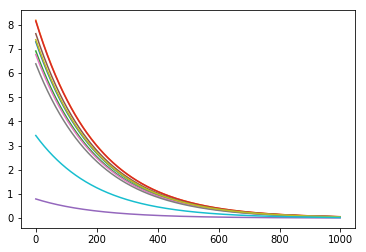

In [8]:
# sanity check: the elements in the diagonal of F are all negative -> each variable is decreased each step, eventually converging to 0
for i in range(10):
    plt.plot([el[i] for el in traj])

## Solvers:

### Goal:

We are trying to approximate the above ODE. One method (which is the same that was used to obtain the above plot) is the Euler's method

### Euler

In [9]:
def eulerSolver(t0, x0, dt, model):
    dxdt = model(x0, dt)
    x0 = x0 + dxdt
    return x0

In [10]:
traj = []
x0 = 10*torch.rand(10)
dt = 0.01
for t in range(1000):
    x_new = eulerSolver(0, x0, dt, model)
    traj.append(x_new)
    x0 = x_new

As expected, this is similar (different random initialization of x0 but oterwise same exponentially decaying behaviour)

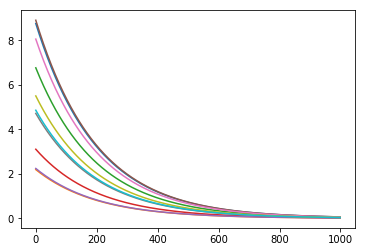

In [11]:
for i in range(10):
    plt.plot([el[i] for el in traj])

### Runge-Kutta 4

In [12]:
def rk4 (t0, x0, dt, model):   
    f1 = model(x0, dt)
    
    c2 = dt * f1 / 2.0
    f2 = model(x0 + c2, dt/2.0)
    
    c3 = dt * f2 / 2.0
    f3 = model(x0 + c3, dt/2.0)
    
    c4 = dt * f3
    f4 = model(x0 + c4, dt)
    
    x0 = x0 + (f1 + 2.0 * f2 + 2.0 * f3 + f4) / 6.0
    return x0

In [13]:
traj = []
x0 = 10*torch.rand(10)
dt = 0.01
for t in range(1000):
    x_new = rk4(0, x0, dt, model)
    traj.append(x_new)
    x0 = x_new

Cool, this works too

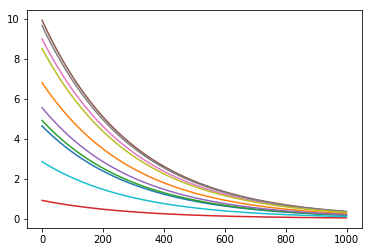

In [14]:
for i in range(10):
    plt.plot([el[i] for el in traj])

# C++ Euler 

Now for the real show:

In [47]:
x_orig = 10*torch.rand(10)

In [48]:
x0 = x_orig
traj1 = []
dt = 0.01
for t in range(1000):
    x_new = eulerSolver(0, x0, dt, model)
    traj1.append(x_new)
    x0 = x_new

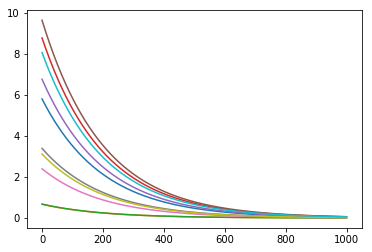

In [49]:
for i in range(10):
    plt.plot([el[i] for el in traj1])

In [50]:
%%timeit
x0 = x_orig
traj2 = []
dt = 0.01
for t in range(1000):
    x_new = pytorchode.odesolver(F, x0, dt, 1, "Euler")
    traj2.append(x_new)
    x0 = x_new

13.4 ms ± 86.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


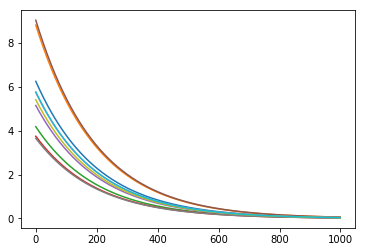

In [30]:
for i in range(10):
    plt.plot([el[i] for el in traj2])

In [31]:
for i in range(len(traj1)):
    delta = traj1[i] - traj2[i]

In [32]:
delta

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# C++ RK4

In [42]:
x_orig = 10*torch.rand(10)

In [43]:
%%timeit
x0 = x_orig
traj1 = []
dt = 0.01
for t in range(1000):
    x_new = rk4(0, x0, dt, model)
    traj1.append(x_new)
    x0 = x_new

135 ms ± 5.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


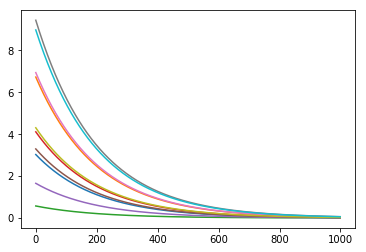

In [44]:
for i in range(10):
    plt.plot([el[i] for el in traj1])

In [45]:
%%timeit
x0 = x_orig
traj2 = []
dt = 0.01
for t in range(1000):
    x_new = pytorchode.odesolver(F, x0, dt, 1, "RK4")
    traj2.append(x_new)
    x0 = x_new

91.9 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


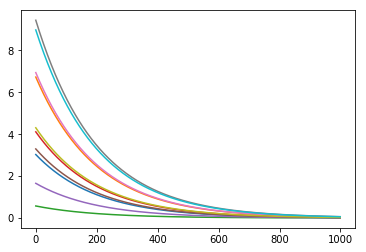

In [46]:
for i in range(10):
    plt.plot([el[i] for el in traj2])

In [38]:
for i in range(len(traj1)):
    delta = traj1[i] - traj2[i]

In [39]:
delta

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])